In [106]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv
import folium
%matplotlib inline

In [105]:
!pip install folium

In [110]:
transport_nodes=pd.read_csv("transport-nodes.csv")
transport_nodes

,id,latitude,longitude,population
0,Amsterdam,52.379189,4.899431,821752
1,Utrecht,52.092876,5.104480,334176
2,Den Haag,52.078663,4.288788,514861
3,Immingham,53.612390,-0.222190,9642
4,Doncaster,53.522850,-1.131160,302400
5,Hoek van Holland,51.977500,4.133330,9382
6,Felixstowe,51.963750,1.351100,23689
7,Ipswich,52.059170,1.155450,133384
8,Colchester,51.889210,0.904210,104390
9,London,51.509865,-0.118092,8787892


In [111]:
transport_arcs=pd.read_csv("transport-relationships.csv")
transport_arcs

,src,dst,relationship,cost
0,Amsterdam,Utrecht,EROAD,46
1,Amsterdam,Den Haag,EROAD,59
2,Den Haag,Rotterdam,EROAD,26
3,Amsterdam,Immingham,EROAD,369
4,Immingham,Doncaster,EROAD,74
5,Doncaster,London,EROAD,277
6,Hoek van Holland,Den Haag,EROAD,27
7,Felixstowe,Hoek van Holland,EROAD,207
8,Ipswich,Felixstowe,EROAD,22
9,Colchester,Ipswich,EROAD,32


In [112]:
### TODO: Construire le graphe et le visualiser  avec la fonction from_pandas_dataframe de networkx

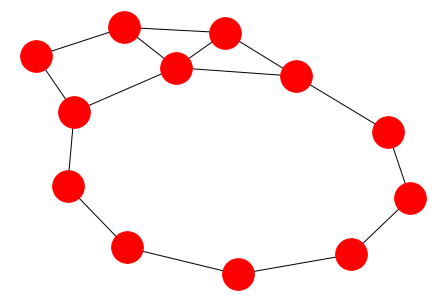

In [135]:
arcs=pd.read_csv('transport-relationships.csv', sep=",")
g=nx.from_pandas_edgelist(arcs,'src','dst',True)
nx.draw(g,width_labels=True, node_color='red', node_size=1000)
plt.savefig("path.png")

In [127]:
g.node

NodeView(('Amsterdam', 'Utrecht', 'Den Haag', 'Rotterdam', 'Immingham', 'Doncaster', 'London', 'Hoek van Holland', 'Felixstowe', 'Ipswich', 'Colchester', 'Gouda'))

In [128]:
'''
Ajouter des attributs
Inputs: 
    Un graphe, 
    un dataframe contenant les données, 
    nom de l'attribut, 
    le nom de la colonne index du dataframe
Pas d'output:
Utiilisez la fonction set_node_attributes de networkx

'''
def ajouterAttribut(myGraphe,dfnoeuds, nomAttribut,nomIndex):
    donnees={}
    for i in range(len(dfnoeuds[nomIndex])):
        donnees[dfnoeuds[nomIndex][i]] = dfnoeuds[nomAttribut][i]
    nx.set_node_attributes(myGraphe, donnees, nomAttribut)

In [140]:
ajouterAttribut(g,transport_nodes,'latitude','id')
ajouterAttribut(g,transport_nodes,'longitude','id')
ajouterAttribut(g,transport_nodes,'population','id')

In [141]:
g.nodes.data()

NodeDataView({'Amsterdam': {'latitude': 52.379189000000004, 'longitude': 4.899431, 'population': 821752}, 'Utrecht': {'latitude': 52.092876000000004, 'longitude': 5.104480000000001, 'population': 334176}, 'Den Haag': {'latitude': 52.078663, 'longitude': 4.288787999999999, 'population': 514861}, 'Rotterdam': {'latitude': 51.9225, 'longitude': 4.47917, 'population': 623652}, 'Immingham': {'latitude': 53.612390000000005, 'longitude': -0.22219, 'population': 9642}, 'Doncaster': {'latitude': 53.52285, 'longitude': -1.13116, 'population': 302400}, 'London': {'latitude': 51.509865000000005, 'longitude': -0.118092, 'population': 8787892}, 'Hoek van Holland': {'latitude': 51.9775, 'longitude': 4.13333, 'population': 9382}, 'Felixstowe': {'latitude': 51.96375, 'longitude': 1.3511, 'population': 23689}, 'Ipswich': {'latitude': 52.05917, 'longitude': 1.15545, 'population': 133384}, 'Colchester': {'latitude': 51.88921, 'longitude': 0.9042100000000001, 'population': 104390}, 'Gouda': {'latitude': 52

In [131]:
import folium
'''
On construit le Map avec une location par defaut
'''
basemap = folium.Map(
    location=[52.3791890, 4.899431],
    zoom_start=12,
    tiles='Stamen Toner'
)



In [136]:
basemap

In [143]:
for i in g.node:
    folium.Marker([g.node[i]['latitude'],g.node[i]['longitude']],tooltip = 'Population '+str(g.node[i]['longitude'])).add_to(basemap)
basemap

In [144]:
'''
Cette fonction permet de construire une liste de liste comprenant pour chaque
sous-liste ses coordonnées et celles d'un voisin
Ces points peuvent etre utilisés pour représenter les lignes dans la carte
Input: le graphe
Output: Une liste de couples representant les longitudes et latitudes d'un point et d'un de ses voisins
'''
def construirePointsImage(myGraphe):
    points = []
    for i in myGraphe.node:
        
        for neighbor in myGraphe.neighbors(i):
            S = []
            S.append([myGraphe.node[i]["latitude"],myGraphe.node[i]["longitude"]])
            S.append([myGraphe.node[neighbor]["latitude"],myGraphe.node[neighbor]["longitude"]])
            points.append(S)
    return points
        

In [145]:
coordonneesvoisins = construirePointsImage(g)
print(coordonneesvoisins)

[[[52.379189000000004, 4.899431], [52.092876000000004, 5.104480000000001]], [[52.379189000000004, 4.899431], [52.078663, 4.288787999999999]], [[52.379189000000004, 4.899431], [53.612390000000005, -0.22219]], [[52.092876000000004, 5.104480000000001], [52.379189000000004, 4.899431]], [[52.092876000000004, 5.104480000000001], [52.01667, 4.70833]], [[52.078663, 4.288787999999999], [52.379189000000004, 4.899431]], [[52.078663, 4.288787999999999], [51.9225, 4.47917]], [[52.078663, 4.288787999999999], [51.9775, 4.13333]], [[52.078663, 4.288787999999999], [52.01667, 4.70833]], [[51.9225, 4.47917], [52.078663, 4.288787999999999]], [[51.9225, 4.47917], [52.01667, 4.70833]], [[51.9225, 4.47917], [51.9775, 4.13333]], [[53.612390000000005, -0.22219], [52.379189000000004, 4.899431]], [[53.612390000000005, -0.22219], [53.52285, -1.13116]], [[53.52285, -1.13116], [53.612390000000005, -0.22219]], [[53.52285, -1.13116], [51.509865000000005, -0.118092]], [[51.509865000000005, -0.118092], [53.52285, -1.13

In [146]:
'''
A faire
Permet de visualiser une carte du graphe avec ses noeuds et les arcs sous forme lignes
Prend en entrée:
- un graphe
- les coordonnées entre chaque point et ses voisins calculées avec la fonction ci-dessus
- Une location par defaut
- Un paramétrage de folium
Output: la carte
'''
        
def visualiserFolium(myGraphe, points, locationpardefaut = [52.3791890, 4.899431],tiles='Stamen Toner' ):
    arcs=construirePointsImage(myGraphe)
    for i in myGraphe.node:
        basemap = folium.Map(
        location=locationpardefaut,
        zoom_start=5,
        tiles=tiles)
        locationpardefaut=[myGraphe.node[i]['latitude'], myGraphe.node[i]['longitude']]
    for i in myGraphe.node:
        folium.Marker([myGraphe.node[i]['latitude'],myGraphe.node[i]['longitude']],tooltip = 'Population '+str(g.node[i]['population'])).add_to(basemap)
    folium.PolyLine(arcs, color="red", weight=2.5, opacity=1).add_to(basemap)
    return basemap

In [147]:
visualiserFolium(g,coordonneesvoisins)

In [148]:
class Noeud:
    def __init__(self,name):
        self.name = name
        self.attributs = {}
        self.listeNomVoisin = []
        
    def setAttribut(self,key, values):
        self.attributs[key]=values
        
    def getAttribut(self,key):
        return self.attributs[key]
    
    def getName(self):
        return self.name
    '''
    Deux noeuds sont egaux s'ils ont même name
    '''
    def egal(self, noeud):
        if self.name==noeud.name:
            return True
        else :
            return False

In [182]:
class Graphe:
    '''
    Les noeuds seront mis dans une liste
    Les arcs forment un dictionnaire avec comme clé les noms des noeuds et comme valeurs une liste de noeud
    '''
    def __init__(self):
        self.noeuds = []
        self.arcs = {}
    '''
    Creer les neouds avec un fichier csv
    On peut mettre tous les noeuds dans une liste
    On doit attribuer à chaque noeud ses attributs: latitude, longitude, population
    On initialise le dictionnaire des arcs en creant la cle avec le nom du noeud et la valeur avec une liste vide
    N'oubliez pas de gerer les exceptions
    '''    
    def creerNoeuds(self,fichiernoeuds):
        G = nx.Graph()
        import csv, sys
        with open(fichiernoeuds, newline='') as f:
            reader = csv.reader(f)
            try:
                for row in reader:
                    print(row)
            except csv.Error as e:
                sys.exit('file {}, line {}: {}'.format(fichiernoeuds, reader.line_num, e))
        listenoeud = [ i for i in fichiernoeuds]
        self.noeuds = G.add_nodes_from(['latitude', 'longitude', 'population'])
        
        return self.noeuds
        
    '''
    - Creer les arcs avec un  fichier csv
    - Utilisez un dictionnaire pour les arcs
    - N'oubliez pas que le graphe est non oriente.
    - Pour chaque noeud on mettra des tuples dans la liste de ses voisins: (nom du voisin, cout du chemin)
    - Gerer les exceptions
    '''   
    def creerArc(self, fichierarcs):
        import csv
        reader = csv.reader(open(fichierarcs))

        result = {}
        for row in reader:
            key = row[0]
            if key in result:
                pass
            result[key] = row[1:]
        print(result)
    '''
    Retrouver un noeud à partir de son nom
    '''   
    def getNoeud(self,name):
        for i in range (len(self.noeuds)):
            if self.noeuds[i] == self.name:
                return self.noeuds[i]
            else:
                return False
        
    '''
    Trouver les noeuds voisins d'un noeud donne
    '''
    
    def euclidean_distance(self, noeuds, name):
        distance = 0.0
        for i in range(len(self.noeuds)-1):
            distance += (self.noeuds[i] - self.name[i])**2
        return sqrt(distance)

    def getVoisins(self, noeuds, j, num_voisins):
        distances = {}
        for i in self.noeuds:
            dist = euclidean_distance(j, i)
            distances.append((i, dist))
        distances.sort(key=lambda tup: tup[1])
        voisins = {}
        for i in range(num_voisins):
            voisins.append(distances[i][0])
        return voisins
                    
                    
    
    '''
    Recuperer pour un noeud donne les latitudes et longitudes de ses voisins
    Constituer des pairs de listes de coordonnées entre le point et ses voisins
    pour une representation sous folium
    
    '''
    def getCoordonnesVoisins(self, noeud):
        listecoord = []
        # voise est un tuple et je veux recuperer le nom du noeud voisin 
        # qui est le premier lement du tuple
        
        for voise in self.getVoisins(noeud):
            # Recupere un noeud voisin
            noeudVoisin = self.getNoeud(voise[0])
            listecoord.append([noeud.getAttribut('coordonnees'),noeudVoisin.getAttribut('coordonnees')])
        return listecoord
    
    '''
    Recuperer les coordonnees d'une liste de neouds pour visualiser sous folium
    Prend en entrée une liste de nom de noeud
    Retourne une liste de sous-listes à deux elements de coordonnées
    '''
    def getListeCoordonnees(self,listeNoeuds):
        coord = []
        for name in listeNoeuds:
            coord.append(self.getNoeud(name).getAttribut('coordonnees'))
        return coord
    
    '''
    Visualiser les noeuds et les arcs sous folium
    Entree: le parametre explored sera utilisé pour les parcours de graphe
    '''
    
    def visualiserFolium(self, locationpardefaut = [52.3791890, 4.899431],tiles='Stamen Toner',explored = None ):
    
        basemap = folium.Map(location= locationpardefaut,zoom_start=6,tiles=tiles)
        
        for i in self.noeuds:
            
            folium.Marker(i.getAttribut('coordonnees'),tooltip = 'Population '+str(i.getAttribut('population'))).add_to(basemap)
            locations = self.getCoordonnesVoisins(i)
            if len(locations)!= 0:
                folium.PolyLine(self.getCoordonnesVoisins(i), color="red", weight=2.5, opacity=1).add_to(basemap)
        if explored != None:
            folium.PolyLine(self.getListeCoordonnees(explored), color="green", weight=2.5, opacity=1).add_to(basemap)
        return basemap

In [152]:
G = Graphe()
G.creerNoeuds('transport-nodes.csv')

['id', 'latitude', 'longitude', 'population']
['Amsterdam', '52.379189', '4.899431', '821752']
['Utrecht', '52.092876', '5.104480', '334176']
['Den Haag', '52.078663', '4.288788', '514861']
['Immingham', '53.61239', '-0.22219', '9642']
['Doncaster', '53.52285', '-1.13116', '302400']
['Hoek van Holland', '51.9775', '4.13333', '9382']
['Felixstowe', '51.96375', '1.3511', '23689']
['Ipswich', '52.05917', '1.15545', '133384']
['Colchester', '51.88921', '0.90421', '104390']
['London', '51.509865', '-0.118092', '8787892']
['Rotterdam', '51.9225', '4.47917', '623652']
['Gouda', '52.01667', '4.70833', '70939']


In [153]:
G.creerArc('transport-relationships.csv')

{'src': ['dst', 'relationship', 'cost'], 'Amsterdam': ['Immingham', 'EROAD', '369'], 'Den Haag': ['Gouda', 'EROAD', '32'], 'Immingham': ['Doncaster', 'EROAD', '74'], 'Doncaster': ['London', 'EROAD', '277'], 'Hoek van Holland': ['Rotterdam', 'EROAD', '33'], 'Felixstowe': ['Hoek van Holland', 'EROAD', '207'], 'Ipswich': ['Felixstowe', 'EROAD', '22'], 'Colchester': ['Ipswich', 'EROAD', '32'], 'London': ['Colchester', 'EROAD', '106'], 'Gouda': ['Utrecht', 'EROAD', '35']}


In [155]:
G = Graphe()
G.visualiserFolium()

In [156]:
class Pile():
    '''
    Classe Pile: voir les definitions ci-dessous
    La classe dispose d'une structure de type list pour ranger les données
    Les consultations, les insertions, les suppressions se font du même cote
    Dernier arrive premier servi : LIFO
    '''
    def __init__(self):
        self.elements = []
    
    '''
    Insere un objet en tete de la pile
    '''
    def push(self,noeud):
        self.elements.insert(0,noeud)
    '''
    Retourne True si  un noeud est dans la pile
    '''
    
    def contains_noeud(self, name):
        for i in range(len(self.elements)):
            return name in self.elements[i].name
                
    '''
    Retourne true si la pile est vide
    '''
    def empty(self):
        return not self.elements
    '''
    Retourne et supprime l'element en tete de pile
    Retourne une exception si la pile est vide
    '''
    def remove(self):
        if not self.elements:
            raise ValueError("la liste est vide")
        else:
            tete=self.elements[0]
            del self.elements[0]
            return tete

In [157]:
class File(Pile):
    '''
    Classe File: voir les definitions ci-dessous
    La classe dispose d'une structure de type list pour ranger les données
    Les éléments sont enfilés (insérés) du coté arrière et défilés (retirés)
    du coté avant
    Premier arrive premier servi : FIFO
    File et Pile peuvent partager certaines methodes donc utilisez l'heritage pour definir
    la classe File. 
    Normalement vous ne devez changer l'implementation d'une seule methode
    '''
   
    def push(self,noeud):
        self.elements.append(noeud)

In [197]:
f=File()
f.push(1)
f.push(5)
f.push(7)
f.push(19)
print(f.elements)
f.remove()
print(f.elements)

[1, 5, 7, 19]
[5, 7, 19]


In [195]:
'''
Implémenter le parcours en profondeur non recursif entre deux noeuds
Prend en parametre:
- un graphe
- un noeud source
- un noeud destination
Output:
une liste contenant les noms des noeuds explorés pour aller du noeud source vers le noeud destination 
Vous completerez certaines parties du code
'''

def parcoursDFS(myGraphe,noeudSRC,noeudDST):
        """Trouver un parcours DFS entre noeudSRC et noeudDST"""

        # Le nombre de noeuds explorés
        num_explored = 0

        # Initialisation de la frontiere avec le noeud source
        
        frontiere = Pile() 
        frontiere.push(noeudSRC)

        # Initialisation de la liste des noeuds explorés
        explored = []

        # On boucle jusuq'à trouver la solution
        while True:

            # S'il n'y a aucun noeud dans la frontiére alors pas de solution
            if frontiere.empty():
                raise Exception("no solution")

            # Choisir un node dans la frontiere
            node = frontiere.remove()
            num_explored += 1

            # Si ce noeud est le noeud destination
            if node.egal(noeudDST):
                
                # Ajouter le aux noeuds deja explorés
                explored.append(noeudDST)
                
                return explored, num_explored

            # Marquer le noeud comme explore
            explored.append(node)

            # Ajouter tous les voisins du noeud à la frontiere
            for n in myGraphe.getVoisins(node):
                
                if not frontiere.contains_noeud(n.name) and n not in explored:
                    frontiere.push(n)

In [ ]:
# Visualisation des arcs en rouge et visualisation des noeuds parcourus pour aller du premier au deuxieme noeud en vert
G = Graphe()
G.visualiserFolium(explored = list(parcoursDFS(G,G.noeuds[0],G.noeuds[1])[0]))

In [192]:
#### TODO: Implementer le parcours en profondeur recursif et calculer le coût du chemin

"""Trouver un parcours DFS entre noeudSRC et noeudDST"""


# Initialisation de la frontiere avec le noeud source
        
frontiere = Pile() 

        # Initialisation de la liste des noeuds explorés
explored = []

def parcoursDFSRec(myGraphe,noeudSRC,noeudDST,cout=0,num_explored=0):
        frontiere.push(noeudSRC)
        if frontiere.empty():
                raise Exception("no solution")

        node = frontiere.remove()
        num_explored += 1
            # Si ce noeud est le noeud destination
        if node.egal(noeudDST):
                
                # Ajouter le aux noeuds deja explorés
                explored.append(noeudDST)
                
                return explored,num_explored
            # Marquer le noeud comme explore
        explored.append(node)

            # Ajouter tous les voisins du noeud à la frontiere
        for n in myGraphe.getVoisins(node):                
            if not frontiere.contains_noeud(n.name) and n not in explored:
                frontiere.push(n)
                cout+=node.getCout(n)
                print(node.name,"--",n.name," cout:",cout)
                parcoursDFSRec(myGraphe,n,noeudDST,cout,num_explored)
        
        return explored,num_explored

In [ ]:
G.visualiserFolium(explored = list(parcoursDFSRec(G,G.noeuds[0],G.noeuds[1])[0]))

In [165]:
'''
Implémenter le parcours en largeur non entre deux noeuds
'''

def parcoursBFS(myGraphe,noeudSRC,noeudDST):
        # Le nombre de noeuds explorés

        # Initialisation de la frontiere avec le noeud source
        
        frontiere = File() 
        frontiere.push(noeudSRC)
        num_explored=0
        # Initialisation de la liste des noeuds explorés
        explored = []
        cout=0
        # On boucle jusqu'à trouver la solution
        while True:
            
            # S'il n'y a aucun noeud dans la frontiére alors pas de solution
            if frontiere.empty():
                raise Exception("no solution")
            # Choisir un node dans la frontiere
            num_explored+=1
            node = frontiere.remove()
            num_explored+=1
            # Si ce noeud est le noeud destination
            if node.egal(noeudDST):
                explored.append(noeudDST)
                return explored,num_explored
            explored.append(node)
            # Ajouter tous les voisins du noeud à la frontiere
            for n in myGraphe.getVoisins(node):
                if not frontiere.contains_noeud(n.name) and n not in explored:
                    frontiere.push(n)
                    cout+=node.getCout(n)
            print(node.name,"--",n.name," cout:",cout)

In [61]:
G.visualiserFolium(explored = list(parcoursBFS(G,G.noeuds[0],G.noeuds[1])[0]))

In [173]:
### Partie 4